# PREDICTION USING DECISION TREE ALGORITHM

# Author-Adarsh Tiwari

# THE SPARKS FOUNDATION (GRIP): DATA SCIENCE AND BUSINESS ANALYTICS

### AIM- Create a Decision tree classifier and visualize it graphically 
###        If we need a new data classifier will it be able to predict the right class accordingly?

## Loading the Dataset

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Iris.csv')

## Data Analysis

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#dropping the id column as it is unnecessary 
df=df.drop('Id',axis=1)

In [6]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [7]:
df.info()#IT verifies dataframe has no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#statistical data  analysis of dataframe
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
#shape of dataset
df.shape

(150, 5)

<AxesSubplot:>

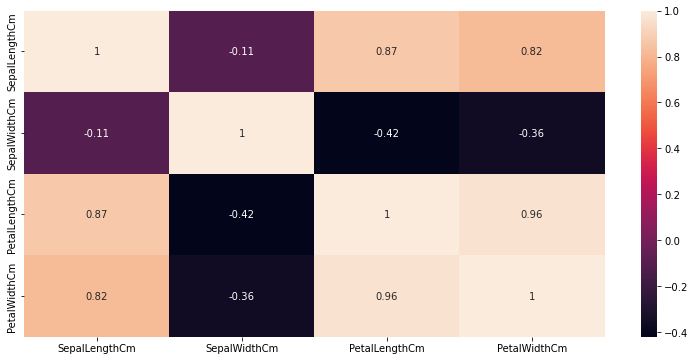

In [15]:
#Finding correlation between data And Plotting it into a heat map
correlation=df.corr()
plt.subplots(figsize=(13,6))
sns.heatmap(correlation,annot=True)

#### petal length ,petal width,sepal length,species is highly positively correlated whereas sepal width is negatively correlated to all

In [17]:
# Converting Categorical Features into Numeric
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(df['Species'])
df['Species']=label.transform(df['Species'])

In [18]:
#check whether Species column has been converted to numeric  
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Splitting the model and training data

In [20]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [41]:
#Splitting the data set to train and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

#### Training the model

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Model trained successfully!')

Model trained successfully!


In [43]:
#Setting up prediction variable on test set
y_pred = dtree.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 2, 0, 0, 1, 1, 0, 2, 0,
       2, 2, 1, 1, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 2, 0, 1,
       2])

#### CONFUSION MATRIX

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[20,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 14]], dtype=int64)

### Classification report 

In [45]:
from sklearn import metrics
print(metrics.classification_report(y_test,y_pred,digits=3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        20
           1      1.000     0.909     0.952        11
           2      0.933     1.000     0.966        14

    accuracy                          0.978        45
   macro avg      0.978     0.970     0.973        45
weighted avg      0.979     0.978     0.978        45



### The model has accuracy of 0.978 or 97.8% which means our model is effective with perfect precision as f1-score is about 0.966

## Visualization of Decision Tree

[Text(372.0, 830.5, 'petal width (cm) <= 0.7\ngini = 0.663\nsamples = 105\nvalue = [30, 39, 36]\nclass = versicolor'),
 Text(279.0, 679.5, 'gini = 0.0\nsamples = 30\nvalue = [30, 0, 0]\nclass = setosa'),
 Text(465.0, 679.5, 'petal width (cm) <= 1.65\ngini = 0.499\nsamples = 75\nvalue = [0, 39, 36]\nclass = versicolor'),
 Text(186.0, 528.5, 'petal length (cm) <= 4.95\ngini = 0.172\nsamples = 42\nvalue = [0, 38, 4]\nclass = versicolor'),
 Text(93.0, 377.5, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]\nclass = versicolor'),
 Text(279.0, 377.5, 'petal width (cm) <= 1.55\ngini = 0.32\nsamples = 5\nvalue = [0, 1, 4]\nclass = virginica'),
 Text(186.0, 226.5, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = virginica'),
 Text(372.0, 226.5, 'petal length (cm) <= 5.45\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1]\nclass = versicolor'),
 Text(279.0, 75.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(465.0, 75.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = v

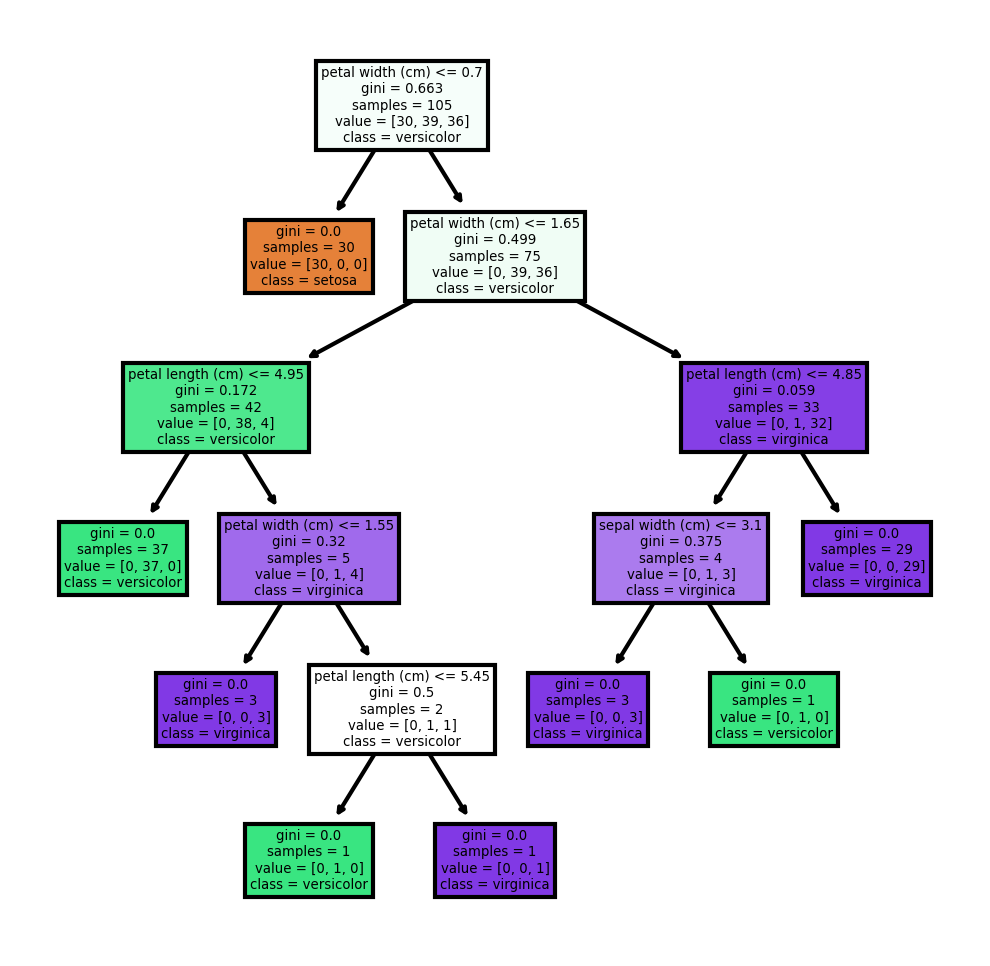

In [46]:
from sklearn import tree
import matplotlib.pyplot as plt

fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa','versicolor','virginica']

fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(dtree, feature_names = fn, class_names = cn, filled = True)

# Result 

### DECISION TREE CLASSIFIER CREATED AND VISUALIZED GRAPHICALLY
### SINCE THE MODEL IS PRECISE AND ACCURATE , IT WILL BE ABLE TO PREDICT RIGHT CLASS IF IT IS GIVEN NEW DATA CLASSIFIER(hence our aim is achieved)

# THANKYOU!